In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# unscaled, log-normalized counts, with conditions subsampled to the same number of cells 
# and 2000 highly variable genes calculated jointly across all perturbation conditions, including control, using scanpy28 with default parameters (Supplementary Methods)

In [3]:
from anndata import read_h5ad
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd 
import scanpy as sc
import seaborn as sns
import string
import sys
sys.path.append("../../scxmatch/src/")
from scxmatch import *
np.random.seed(42)

In [4]:
test_group = 10000
reference = 0
group_by = "dose_value"

In [21]:
df = pd.read_csv("../evaluation_results/sciplex_MCF7_matching_properties.txt", delimiter=", ").drop(["p", "z"], axis=1)

/tmp/ipykernel_1437650/210147786.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("../evaluation_results/sciplex_MCF7_matching_properties.txt", delimiter=", ").drop(["p", "z"], axis=1)


In [22]:
df.loc[df["k"].isna(), "k"] = df.loc[df["k"].isna(), "#nodes"] - 1

In [24]:
groups = sorted(df["test"].unique())

In [25]:
colors = sns.color_palette("hls", len(groups) + 1)
pal = {group: colors[i] for i, group in enumerate(groups + [reference])}

In [26]:
melted = pd.melt(df[df["#nodes"] >= 1000], id_vars=["k", "ref", "test", "#nodes"], var_name="metric")

<Figure size 800x800 with 0 Axes>

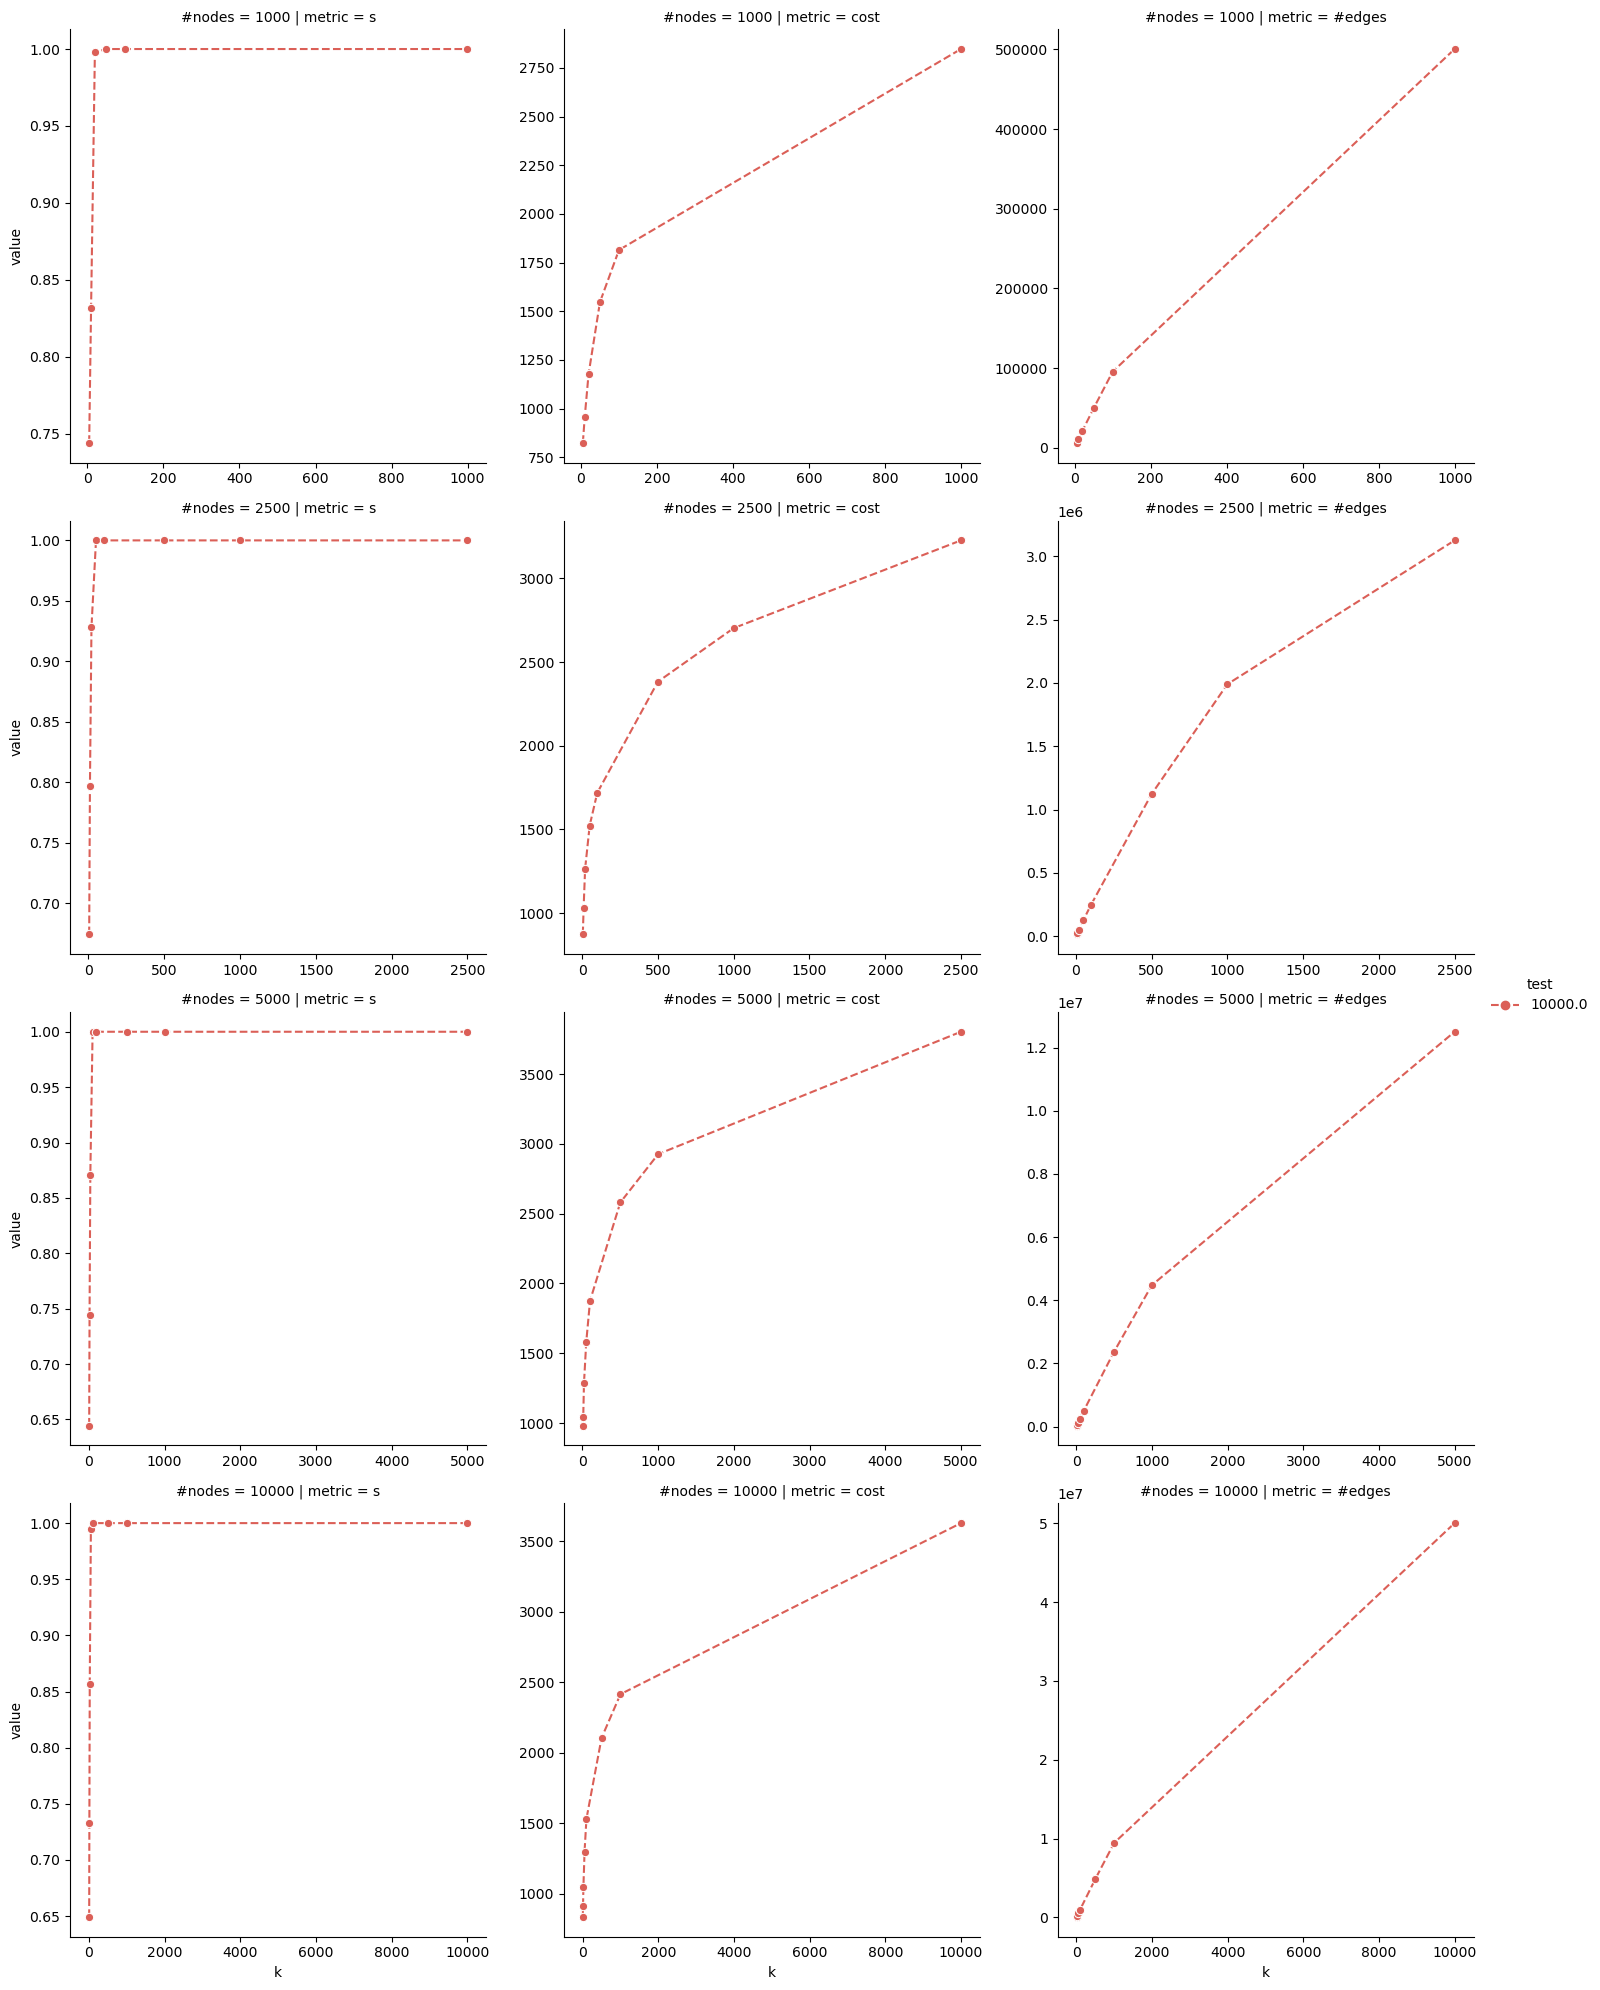

In [29]:
plt.figure(figsize=(8, 8))
sns.relplot(melted, x="k", y="value", col="metric", hue="test", row="#nodes", facet_kws={"sharex": False, "sharey":False}, kind="line", palette=pal, marker="o", linestyle="dashed")